In [1]:
import sys
sys.path.append('/eos/user/s/sterbini/MD_ANALYSIS/public/')
from myToolbox import *

Version 0.03. This is the latest version.
Please help me to improve it reporting bugs to guido.sterbini@cern.ch.
Your platform is Linux-3.10.0-514.10.2.el7.x86_64-x86_64-with-redhat-6.7-Carbon
Your folder is /eos/user/s/sterbini/MD_ANALYSIS
Your IP is 172.17.0.18
2017-09-13 17:13:53


# Getting the hypercycle

In [2]:
startTime=datetime.datetime(2017,7,1,12,30)
endTime=datetime.datetime(2017,7,2)
fillDF,modeDF=myToolbox.LHCFillsByTime2pnd(startTime-datetime.timedelta(hours=6),endTime-datetime.timedelta(hours=1))

In [3]:
fillDF

,startTime,endTime,duration
5897,2017-07-01 08:20:56.947,2017-07-01 12:14:13.775,03:53:16.828000
5898,2017-07-01 12:14:13.776,2017-07-01 14:54:40.318,02:40:26.542000
5899,2017-07-01 14:54:40.319,2017-07-01 15:48:00.347,00:53:20.028000
5900,2017-07-01 15:48:00.348,2017-07-02 00:12:29.255,08:24:28.907000


In [4]:
modeDF

,mode,startTime,endTime,duration
5897,INJPROT,2017-07-01 10:00:50.564,2017-07-01 10:56:03.847,00:55:13.283000
5897,INJPHYS,2017-07-01 10:56:03.848,2017-07-01 11:49:49.024,00:53:45.176000
5897,NOBEAM,2017-07-01 11:49:49.025,2017-07-01 12:14:09.503,00:24:20.478000
5897,CYCLING,2017-07-01 12:14:09.504,2017-07-01 12:14:13.775,00:00:04.271000
5898,SETUP,2017-07-01 12:59:57.123,2017-07-01 13:08:14.348,00:08:17.225000
5898,INJPROT,2017-07-01 13:08:14.349,2017-07-01 13:47:19.669,00:39:05.320000
5898,INJPHYS,2017-07-01 13:47:19.670,2017-07-01 14:19:17.326,00:31:57.656000
5898,PRERAMP,2017-07-01 14:19:17.327,2017-07-01 14:23:44.983,00:04:27.656000
5898,RAMP,2017-07-01 14:23:44.984,2017-07-01 14:44:33.669,00:20:48.685000
5898,FLATTOP,2017-07-01 14:44:33.670,2017-07-01 14:48:39.328,00:04:05.658000


### Some plotting

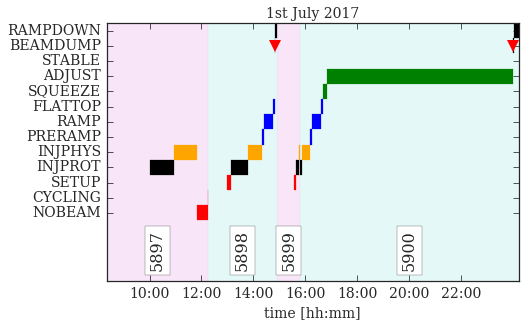

In [7]:
myTitle='1st July 2017'
aux=fillDF
b=modeDF
def colorMe(i):
    if np.mod(i,2):
        return "m"
    else:
        return "c"

for i in aux.index:
    plt.gca().fill_between([aux[aux.index==i]['startTime'].values[0],
                            aux[aux.index==i]['endTime'].values[0]], [0,0], [2.1,2.1],color=colorMe(i), alpha=.1)
    
    
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='NOBEAM']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [.8,.8], [.9,.9],color='r')
        
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='CYCLING']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [.9,.9], [1,1],color='r')
          
    
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='SETUP']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1,1], [1.1,1.1],color='r')
          
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='INJPROT']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.1,1.1], [1.2,1.2],color='k')
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='INJPHYS']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.2,1.2], [1.3,1.3],color='orange')
        
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='PRERAMP']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.3,1.3], [1.4,1.4],color='b')
        
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='RAMP']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.4,1.4], [1.5,1.5],color='b')
        
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='FLATTOP']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.5,1.5], [1.6,1.6],color='b')
    
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='SQUEEZE']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.6,1.6], [1.7,1.7],color='g')

    bb=b[b.index==i]
    bbb=bb[bb['mode']=='ADJUST']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.7,1.7], [1.8,1.8],color='g')
        
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='STABLE']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.8,1.8], [1.9,1.9],color='g')
        
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='BEAMDUMP']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [1.9,1.9], [2,2],color='k')
        plt.plot(bbb['startTime'].values[0],1.95,'vr',ms=12)
        
    bb=b[b.index==i]
    bbb=bb[bb['mode']=='RAMPDOWN']
    if len(bbb): 
        plt.gca().fill_between([bbb['startTime'].values[0],
                                bbb['endTime'].values[0]], [2,2], [2.1,2.1],color='k')

    
    myTest=aux[aux.index==i]['duration']>datetime.timedelta(hours=.3)
    if myTest.values[0]:
        myDiff=(pnd.to_datetime(aux[aux.index==i]['endTime'].values[0])-pnd.to_datetime(aux[aux.index==i]['startTime'].values[0]))/2
        myTime=pnd.to_datetime(aux[aux.index==i]['startTime'].values[0])+myDiff
        plt.text(myTime,.6 ,str(i), bbox=dict(facecolor='w', alpha=1),horizontalalignment='center',verticalalignment='center', rotation=90)
plt.yticks([.85, .95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05],
           ['NOBEAM','CYCLING','SETUP','INJPROT','INJPHYS',
            'PRERAMP','RAMP','FLATTOP','SQUEEZE','ADJUST','STABLE','BEAMDUMP','RAMPDOWN']);

plt.ylim(0.4,2.1);
plt.title(myTitle)
t = np.arange(startTime-datetime.timedelta(hours=2.5), endTime, datetime.timedelta(hours=2)).astype(datetime.datetime)
plt.xticks(t);
myFmt =mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt);
plt.xlabel('time [hh:mm]')

# A simple data extraction

In [8]:
rawDF=myToolbox.cals2pnd(['LHC.BOFSU:OFC_ENERGY','LHC.BCTFR.A6R4.B1:BEAM_INTENSITY','LHC.BCTFR.A6R4.B2:BEAM_INTENSITY'],
                  startTime,endTime)

In [9]:
rawDF.tail()

,LHC.BCTFR.A6R4.B2:BEAM_INTENSITY,LHC.BCTFR.A6R4.B1:BEAM_INTENSITY,LHC.BOFSU:OFC_ENERGY
2017-07-01 23:59:55.448,0.0,0.0,NaN
2017-07-01 23:59:56.448,0.0,0.0,NaN
2017-07-01 23:59:57.448,0.0,0.0,NaN
2017-07-01 23:59:58.448,0.0,0.0,NaN
2017-07-01 23:59:59.449,0.0,0.0,NaN


# Adding rows

In [10]:
rawDF=myToolbox.addRowsFromCals(rawDF, deltaTime=datetime.timedelta(minutes=60))

In [11]:
rawDF.tail()

,LHC.BCTFR.A6R4.B2:BEAM_INTENSITY,LHC.BCTFR.A6R4.B1:BEAM_INTENSITY,LHC.BOFSU:OFC_ENERGY
2017-07-02 00:59:54.676,0.0,0.0,NaN
2017-07-02 00:59:55.676,0.0,0.0,NaN
2017-07-02 00:59:56.676,0.0,0.0,NaN
2017-07-02 00:59:57.676,0.0,0.0,NaN
2017-07-02 00:59:58.676,0.0,0.0,NaN


# Adding columns

In [20]:
rawDF=myToolbox.addColumnsFromCals(rawDF, ['ATLAS:LUMI_TOT_INST','CMS:LUMI_TOT_INST'])

In [22]:
rawDF.between_time('21:00','21:02')

,ATLAS:LUMI_TOT_INST,CMS:LUMI_TOT_INST,LHC.BCTFR.A6R4.B1:BEAM_INTENSITY,LHC.BCTFR.A6R4.B2:BEAM_INTENSITY,LHC.BOFSU:OFC_ENERGY
2017-07-01 21:00:00.748,NaN,NaN,5.565786e+12,2.432736e+11,NaN
2017-07-01 21:00:01.748,NaN,NaN,5.565699e+12,2.432717e+11,NaN
2017-07-01 21:00:02.748,NaN,NaN,5.565673e+12,2.432734e+11,NaN
2017-07-01 21:00:03.748,NaN,NaN,5.565730e+12,2.432570e+11,NaN
2017-07-01 21:00:04.748,NaN,NaN,5.565695e+12,2.432529e+11,NaN
2017-07-01 21:00:05.748,NaN,NaN,5.565495e+12,2.432608e+11,NaN
2017-07-01 21:00:06.748,NaN,NaN,5.565525e+12,2.432599e+11,NaN
2017-07-01 21:00:07.748,NaN,NaN,5.565470e+12,2.432615e+11,NaN
2017-07-01 21:00:08.748,NaN,NaN,5.565464e+12,2.432537e+11,NaN
2017-07-01 21:00:09.748,NaN,NaN,5.565407e+12,2.432526e+11,NaN


# Interesting methods of pytimber

In [16]:
# Please use version >=2.4.2
pytimber.__version__ 

'2.4.2'

In [17]:
log.getUnit('%:LUMI_TOT_INST')

{u'ALICE:LUMI_TOT_INST': u'Hz/ub',
 u'ATLAS:LUMI_TOT_INST': u'Hz/ub',
 u'CMS:LUMI_TOT_INST': u'Hz/ub',
 u'LHCB:LUMI_TOT_INST': u'Hz/ub',
 u'LHCF:LUMI_TOT_INST': u'Hz/ub',
 u'TOTEM:LUMI_TOT_INST': u'Hz/ub'}

In [18]:
log.getDescription('%:LUMI_TOT_INST')

{u'ALICE:LUMI_TOT_INST': u'ALICE: Total instantaneous luminosity summed over all bunches',
 u'ATLAS:LUMI_TOT_INST': u'ATLAS: Total instantaneous luminosity summed over all bunches',
 u'CMS:LUMI_TOT_INST': u'CMS: Total instantaneous luminosity summed over all bunches',
 u'LHCB:LUMI_TOT_INST': u'LHCB: Total instantaneous luminosity summed over all bunches',
 u'LHCF:LUMI_TOT_INST': u'LHCF: Total instantaneous luminosity summed over all bunches',
 u'TOTEM:LUMI_TOT_INST': u'TOTEM: Total instantaneous luminosity summed over all bunches'}